In [ ]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns

In [ ]:
#loading the dataset
df_2022 = pd.read_csv('/content/Dhaka_PM2.5_2022.csv')
df_2021 = pd.read_csv('/content/Dhaka_PM2.5_2021.csv')
df_2020 = pd.read_csv('/content/Dhaka_PM2.5_2020.csv')
df_2019 = pd.read_csv('/content/Dhaka_PM2.5_2019.csv')
df_2018 = pd.read_csv('/content/Dhaka_PM2.5_2018.csv')
df_2017 = pd.read_csv('/content/Dhaka_PM2.5_2017.csv')
df_2016 = pd.read_csv('/content/Dhaka_PM2.5_2016.csv')

In [ ]:
#concatenating for further use
df = pd.concat([df_2022,df_2021,df_2020,df_2019,df_2018,df_2017,df_2016])
df.head()

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
0,01/01/2022 02:00,2,130.1,129,ug/m3,190,Unhealthy,Valid
1,01/01/2022 03:00,3,128.1,126,ug/m3,188,Unhealthy,Valid
2,01/01/2022 04:00,4,125.1,121,ug/m3,187,Unhealthy,Valid
3,01/01/2022 05:00,5,125.6,126,ug/m3,187,Unhealthy,Valid
4,01/01/2022 06:00,6,124.2,120,ug/m3,186,Unhealthy,Valid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53355 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date (LT)      53355 non-null  object 
 1   Hour           53355 non-null  int64  
 2   NowCast Conc.  53355 non-null  float64
 3   Raw Conc.      53355 non-null  int64  
 4   Conc. Unit     53355 non-null  object 
 5   AQI            53355 non-null  int64  
 6   AQI Category   51497 non-null  object 
 7   QC Name        53355 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.7+ MB


In [ ]:
df.columns= df.columns.str.lower()

In [ ]:
df.columns = df.columns.str.replace(' ', '_')


In [ ]:
df.head()

,date_(lt),hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name
0,01/01/2022 02:00,2,130.1,129,ug/m3,190,Unhealthy,Valid
1,01/01/2022 03:00,3,128.1,126,ug/m3,188,Unhealthy,Valid
2,01/01/2022 04:00,4,125.1,121,ug/m3,187,Unhealthy,Valid
3,01/01/2022 05:00,5,125.6,126,ug/m3,187,Unhealthy,Valid
4,01/01/2022 06:00,6,124.2,120,ug/m3,186,Unhealthy,Valid


In [ ]:
df.rename(columns={'date_(lt)': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53355 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           53355 non-null  datetime64[ns]
 1   hour           53355 non-null  int64         
 2   nowcast_conc.  53355 non-null  float64       
 3   raw_conc.      53355 non-null  int64         
 4   conc._unit     53355 non-null  object        
 5   aqi            53355 non-null  int64         
 6   aqi_category   51497 non-null  object        
 7   qc_name        53355 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
date,0
hour,0
nowcast_conc.,0
raw_conc.,0
conc._unit,0
aqi,0
aqi_category,1858
qc_name,0


In [ ]:
df['aqi_category'].fillna('Unknown', inplace=True)

<ipython-input-210-881725618d49>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['aqi_category'].fillna('Unknown', inplace=True)


In [ ]:
df.isnull().sum()


,0
date,0
hour,0
nowcast_conc.,0
raw_conc.,0
conc._unit,0
aqi,0
aqi_category,0
qc_name,0


In [ ]:
df.columns


Index(['date', 'hour', 'nowcast_conc.', 'raw_conc.', 'conc._unit', 'aqi',
       'aqi_category', 'qc_name'],
      dtype='object')

In [ ]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name,month,day
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,Valid,1,1
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,Valid,1,1
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,Valid,1,1
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,Valid,1,1
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,Valid,1,1


In [ ]:
df.head()


,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name,month,day
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,Valid,1,1
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,Valid,1,1
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,Valid,1,1
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,Valid,1,1
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,Valid,1,1


In [ ]:
df.drop(columns = 'qc_name', inplace = True)


# Handling Categorical Data


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
LE = LabelEncoder()


In [ ]:
df['aqi_le'] = LE.fit_transform(df['aqi_category'])


In [ ]:
df.head()


,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,month,day,aqi_le
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,1,1,3
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,1,1,3
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,1,1,3
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,1,1,3
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,1,1,3


<ipython-input-220-0a518faf63ce>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


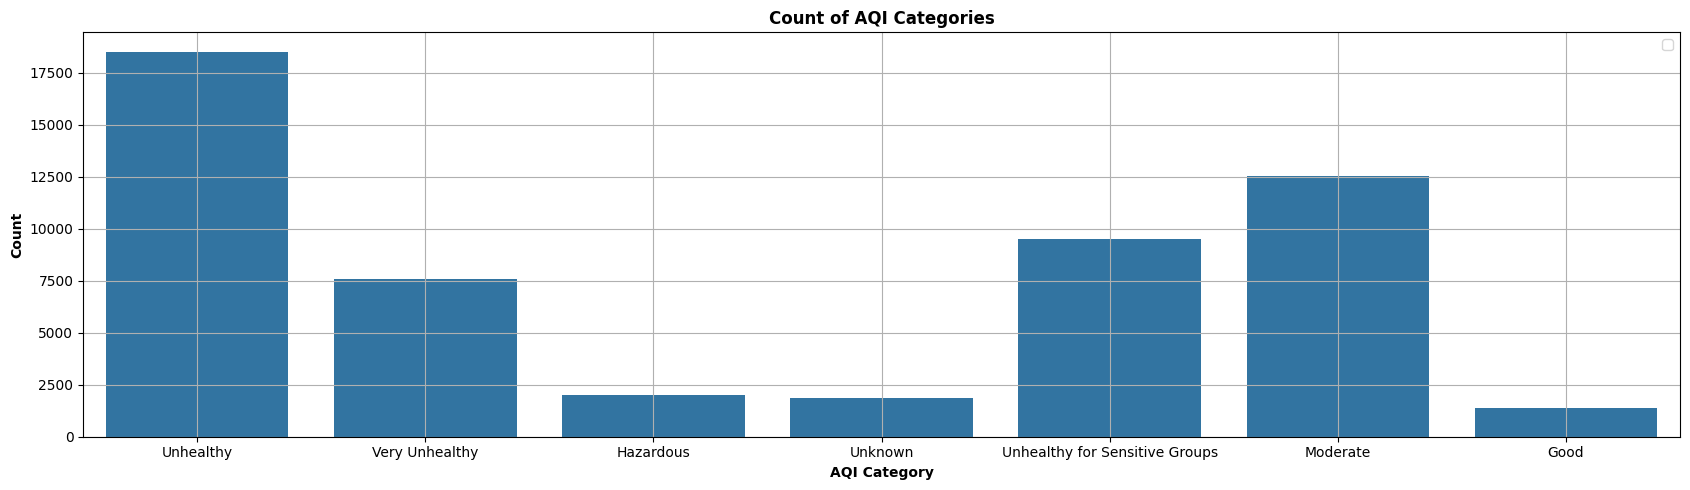

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (17,5))
sns.countplot(x=df['aqi_category'])

plt.xlabel('AQI Category', fontweight = 'bold' )
plt.ylabel('Count', fontweight = 'bold' )
plt.title('Count of AQI Categories', fontweight = 'bold' )
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
main_df = df.drop(columns= ['date','conc._unit'])

In [ ]:
main_df['aqi_category'].unique()

array(['Unhealthy', 'Very Unhealthy', 'Hazardous', 'Unknown',
       'Unhealthy for Sensitive Groups', 'Moderate', 'Good'], dtype=object)

In [ ]:
main_df['aqi_le'].unique()

array([3, 6, 1, 5, 4, 2, 0])

In [ ]:
# Defining the mapping of numerical values to AQI categories
aqi_ranking = {
'Hazardous': 6,
'Very Unhealthy': 5,
'Unhealthy for Sensitive Groups': 4,
'Unhealthy': 3,
'Moderate': 2,
'Good': 1,
'Unknown': 0
}

# Create the new column 'aqi_map' and map the numerical values to AQI categories
main_df['aqi_map'] = main_df['aqi_category'].replace(aqi_ranking)
main_df[12:100:12]


<ipython-input-224-14a5ff86e3a3>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df['aqi_map'] = main_df['aqi_category'].replace(aqi_ranking)


,hour,nowcast_conc.,raw_conc.,aqi,aqi_category,month,day,aqi_le,aqi_map
12,14,107.1,90,178,Unhealthy,1,1,3,3
24,2,140.8,135,195,Unhealthy,1,2,3,3
36,14,194.4,192,245,Very Unhealthy,1,2,6,5
48,2,221.0,195,271,Very Unhealthy,1,3,6,5
60,14,153.5,117,204,Very Unhealthy,1,3,6,5
72,2,204.7,201,255,Very Unhealthy,1,4,6,5
84,14,199.8,189,250,Very Unhealthy,1,4,6,5
96,2,218.2,208,268,Very Unhealthy,1,5,6,5


In [ ]:
main_df = main_df.drop(columns = ['aqi_le', 'aqi_category'])
main_df

,hour,nowcast_conc.,raw_conc.,aqi,month,day,aqi_map
0,2,130.1,129,190,1,1,3
1,3,128.1,126,188,1,1,3
2,4,125.1,121,187,1,1,3
3,5,125.6,126,187,1,1,3
4,6,124.2,120,186,1,1,3
...,...,...,...,...,...,...,...
8779,20,219.8,243,270,12,31,5
8780,21,256.4,293,307,12,31,6
8781,22,261.7,267,312,12,31,6
8782,23,291.3,321,341,12,31,6


In [ ]:
X= main_df.drop(columns = ['aqi_map'])
y = main_df['aqi_map']

In [ ]:
X= main_df.drop(columns = ['aqi_map'])
y = main_df['aqi_map']

<Axes: >

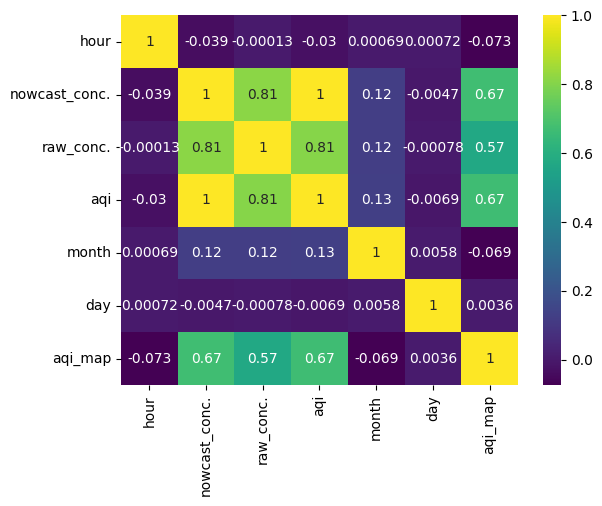

In [ ]:
sns.heatmap(main_df.corr(),annot =True, cmap = 'viridis')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

rfr = RandomForestRegressor()

rfr = RandomForestRegressor()

rfecv = RFECV(estimator = rfr, cv=5, scoring = 'r2')



In [ ]:
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestRegressor(), scoring='r2')

In [ ]:
selected_features = X_train.columns[rfecv.support_]
selected_features


Index(['nowcast_conc.', 'aqi', 'day'], dtype='object')

In [ ]:

#Ensembling
# Train the RandomForestRegressor on the selected features
rfr.fit(X_train[selected_features], y_train)

#finally predict on test data
y_pred = rfr.predict(X_test[selected_features])

r2_score(y_test,y_pred)

0.9999999600004057

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Neural Network model with tuned parameters
neural_net = MLPRegressor(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)

# Train and evaluate Neural Network
neural_net.fit(X_train_scaled, y_train)
y_pred_nn = neural_net.predict(X_test_scaled)
nn_score = r2_score(y_test, y_pred_nn)
print(f"Neural Network R² Score: {nn_score:.4f}")


Neural Network R² Score: 0.9931


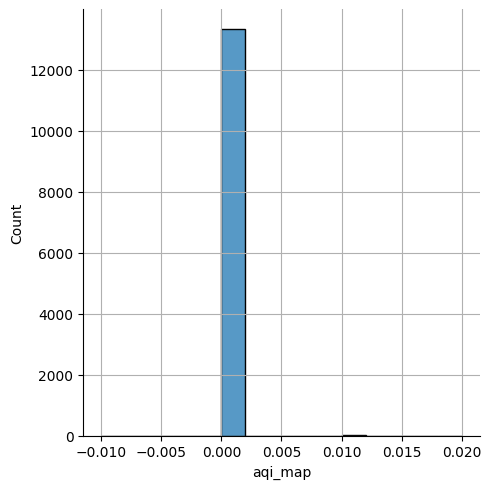

In [ ]:
#plotting
import matplotlib.pyplot as plt
sns.displot(y_test-y_pred)
plt.grid(True)
plt.savefig('fig-2.png')